In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE

from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn import tree
import xgboost as xgb
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_tree

import gc
from tqdm import tqdm

In [2]:
column_defs = pd.read_excel('data\LCDataDictionary.xlsx',index_col='LoanStatNew')
column_defs.columns

Index(['Description'], dtype='object')

In [3]:
column_defs

,Description
LoanStatNew,
acc_now_delinq,The number of accounts on which the borrower i...
acc_open_past_24mths,Number of trades opened in past 24 months.
addr_state,The state provided by the borrower in the loan...
all_util,Balance to credit limit on all trades
annual_inc,The self-reported annual income provided by th...
...,...
settlement_amount,The loan amount that the borrower has agreed t...
settlement_percentage,The settlement amount as a percentage of the p...
settlement_term,The number of months that the borrower will be...


In [4]:
def column_info(col_name):
    return column_defs.loc[col_name]['Description']

In [24]:
cols_to_drop

136                          hardship_loan_status
127                               hardship_reason
128                               hardship_status
135                                  hardship_dpd
133                       payment_plan_start_date
126                                 hardship_type
129                                 deferral_term
131                           hardship_start_date
132                             hardship_end_date
134                               hardship_length
137    orig_projected_additional_accrued_interest
130                               hardship_amount
138                hardship_payoff_balance_amount
139                  hardship_last_payment_amount
120                            sec_app_revol_util
57                      verification_status_joint
113                               revol_bal_joint
119                              sec_app_open_acc
116                      sec_app_earliest_cr_line
118                              sec_app_mort_acc


In [25]:
len(columns_to_drop)

67

In [5]:
columns_to_drop = ['mths_since_last_delinq',
 'mths_since_last_record',
 'next_pymnt_d',
 'mths_since_last_major_derog',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'mths_since_rcnt_il',
 'il_util',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_revol_delinq',
 'revol_bal_joint',
 'sec_app_fico_range_low',
 'sec_app_fico_range_high',
 'sec_app_earliest_cr_line',
 'sec_app_inq_last_6mths',
 'sec_app_mort_acc',
 'sec_app_open_acc',
 'sec_app_revol_util',
 'sec_app_open_act_il',
 'sec_app_num_rev_accts',
 'sec_app_chargeoff_within_12_mths',
 'sec_app_collections_12_mths_ex_med',
 'hardship_type',
 'hardship_reason',
 'hardship_status',
 'deferral_term',
 'hardship_amount',
 'hardship_start_date',
 'hardship_end_date',
 'payment_plan_start_date',
 'hardship_length',
 'hardship_dpd',
 'hardship_loan_status',
 'orig_projected_additional_accrued_interest',
 'hardship_payoff_balance_amount',
 'hardship_last_payment_amount','policy_code','url','out_prncp_inv','total_pymnt_inv','funded_amnt_inv','funded_amnt',
              'num_sats','tot_hi_cred_lim','num_rev_tl_bal_gt_0','collection_recovery_fee'
             ,'bc_open_to_buy','percent_bc_gt_75','open_acc','num_actv_bc_tl','num_actv_rev_tl','num_rev_accts'
             ,'total_rev_hi_lim','all_util', 'inq_last_12m', 'total_cu_tl', 'open_acc_6m',
       'open_rv_12m', 'open_act_il', 'open_il_24m', 'total_bal_il',
       'open_il_12m', 'open_rv_24m', 'max_bal_bc', 'inq_fi']

In [26]:
len(corr_drops)

15

In [6]:
corr_drops = ['out_prncp_inv','total_pymnt_inv','funded_amnt_inv','funded_amnt',
              'num_sats','tot_hi_cred_lim','num_rev_tl_bal_gt_0','collection_recovery_fee'
             ,'bc_open_to_buy','percent_bc_gt_75','open_acc','num_actv_bc_tl','num_actv_rev_tl','num_rev_accts'
             ,'total_rev_hi_lim']

In [7]:
df = pd.read_csv('data\Loan_status_2007-2020Q3.gzip',low_memory=False)

In [8]:
df.head()

,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag
0,0,1077501,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
1,1,1077430,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
2,2,1077175,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
3,3,1076863,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
4,4,1075358,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N


In [9]:
def reduce_mem_usage(df, int_cast=True, obj_to_category=False, subset=None):
    """
    Iterate through all the columns of a dataframe and modify the data type to reduce memory usage.
    :param df: dataframe to reduce (pd.DataFrame)
    :param int_cast: indicate if columns should be tried to be casted to int (bool)
    :param obj_to_category: convert non-datetime related objects to category dtype (bool)
    :param subset: subset of columns to analyse (list)
    :return: dataset with the column dtypes adjusted (pd.DataFrame)
    """
    start_mem = df.memory_usage().sum() / 1024 ** 2;
    gc.collect()
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))

    cols = subset if subset is not None else df.columns.tolist()

    for col in tqdm(cols):
        col_type = df[col].dtype

        if col_type != object and col_type.name != 'category' and 'datetime' not in col_type.name:
            c_min = df[col].min()
            c_max = df[col].max()

            # test if column can be converted to an integer
            treat_as_int = str(col_type)[:3] == 'int'
            if int_cast and not treat_as_int:
                treat_as_int = check_if_integer(df[col])

            if treat_as_int:
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.uint8).min and c_max < np.iinfo(np.uint8).max:
                    df[col] = df[col].astype(np.uint8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.uint16).min and c_max < np.iinfo(np.uint16).max:
                    df[col] = df[col].astype(np.uint16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.uint32).min and c_max < np.iinfo(np.uint32).max:
                    df[col] = df[col].astype(np.uint32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
                elif c_min > np.iinfo(np.uint64).min and c_max < np.iinfo(np.uint64).max:
                    df[col] = df[col].astype(np.uint64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        elif 'datetime' not in col_type.name and obj_to_category:
            df[col] = df[col].astype('category')
    gc.collect()
    end_mem = df.memory_usage().sum() / 1024 ** 2
    print('Memory usage after optimization is: {:.3f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))

    return df

In [10]:
#df.drop(columns=columns_to_drop,axis=1,inplace=True)

In [10]:
reduce_mem_usage(df,int_cast=False)

  0%|          | 0/142 [00:00<?, ?it/s]

Memory usage of dataframe is 3169.40 MB


100%|██████████| 142/142 [01:12<00:00,  1.96it/s]


Memory usage after optimization is: 1484.263 MB
Decreased by 53.2%


,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag
0,0,1077501,5000.0,5000.0,4976.0,36 months,10.65%,162.87500,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
1,1,1077430,2500.0,2500.0,2500.0,60 months,15.27%,59.84375,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
2,2,1077175,2400.0,2400.0,2400.0,36 months,15.96%,84.31250,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
3,3,1076863,10000.0,10000.0,10000.0,36 months,13.49%,339.25000,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
4,4,1075358,3000.0,3000.0,3000.0,60 months,12.69%,67.81250,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925488,105446,102556443,24000.0,24000.0,24000.0,60 months,23.99%,690.50000,E,E2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
2925489,105447,102653304,10000.0,10000.0,10000.0,36 months,7.99%,313.25000,A,A5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
2925490,105448,102628603,10048.0,10048.0,10048.0,36 months,16.99%,358.25000,D,D1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
2925491,105449,102196576,6000.0,6000.0,6000.0,36 months,11.44%,197.75000,B,B4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N


In [11]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2925493 entries, 0 to 2925492
Data columns (total 142 columns):
 #   Column                                      Dtype  
---  ------                                      -----  
 0   Unnamed: 0                                  int32  
 1   id                                          object 
 2   loan_amnt                                   float16
 3   funded_amnt                                 float16
 4   funded_amnt_inv                             float16
 5   term                                        object 
 6   int_rate                                    object 
 7   installment                                 float16
 8   grade                                       object 
 9   sub_grade                                   object 
 10  emp_title                                   object 
 11  emp_length                                  object 
 12  home_ownership                              object 
 13  annual_inc                

In [12]:
df.drop('Unnamed: 0',axis=1,inplace=True)

([<matplotlib.axis.YTick at 0x26c8003fa00>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

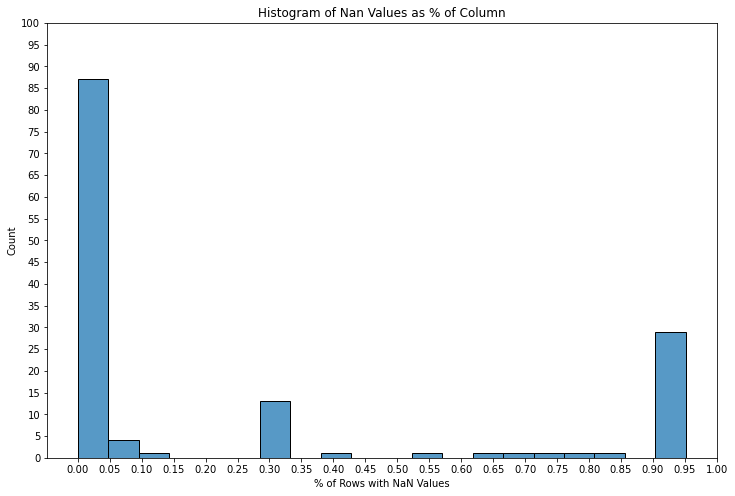

In [13]:
fig,ax = plt.subplots(figsize=(12,8))
sns.histplot(data=df.isna().mean(),bins=20)
plt.xticks(np.linspace(0,1,21))
plt.title("Histogram of Nan Values as % of Column")
plt.xlabel('% of Rows with NaN Values')
plt.yticks(np.linspace(0,100,21))

Roughly 50 columns missing 25% of values in the columns will drop these

In [18]:
df.isna().mean().reset_index().sort_values(by=0,ascending=False)

,index,0
136,hardship_loan_status,9.509789e-01
127,hardship_reason,9.509033e-01
128,hardship_status,9.509023e-01
135,hardship_dpd,9.509016e-01
133,payment_plan_start_date,9.509013e-01
...,...,...
38,total_pymnt,3.418227e-07
37,out_prncp_inv,3.418227e-07
36,out_prncp,3.418227e-07
35,initial_list_status,3.418227e-07


In [19]:
nan_pct = df.isna().mean().reset_index().sort_values(by=0,ascending=False)

In [21]:
nan_pct[nan_pct[0] >=.25]['index'], print(len(nan_pct[nan_pct[0] >=.25]['index']))

49


(136                          hardship_loan_status
 127                               hardship_reason
 128                               hardship_status
 135                                  hardship_dpd
 133                       payment_plan_start_date
 126                                 hardship_type
 129                                 deferral_term
 131                           hardship_start_date
 132                             hardship_end_date
 134                               hardship_length
 137    orig_projected_additional_accrued_interest
 130                               hardship_amount
 138                hardship_payoff_balance_amount
 139                  hardship_last_payment_amount
 120                            sec_app_revol_util
 57                      verification_status_joint
 113                               revol_bal_joint
 119                              sec_app_open_acc
 116                      sec_app_earliest_cr_line
 118                           

In [27]:
cols_to_drop = nan_pct[nan_pct[0] >=.25]['index']

In [28]:
#Dropped features with 25% or more nan values
df.drop(columns=cols_to_drop,axis=1,inplace=True)

In [29]:
#checking predictors for multicollinearity
test = df.corr().abs().stack().reset_index().sort_values(0,ascending=False)
test['pairs'] = list(zip(test.level_0,test.level_1))
test.set_index(['pairs'], inplace=True)
test.drop(columns=['level_1','level_0'], inplace=True)
test.columns = ['cc']
test.drop_duplicates(inplace=True)
test.sort_values('cc',ascending=False, inplace=True)
multicollinear_predictors = test[test.cc >.75]
multicollinear_predictors.reset_index(inplace=True)

In [30]:
multicollinear_predictors['column_1'] = multicollinear_predictors.pairs.map(lambda x : x[0])
multicollinear_predictors['column_2'] = multicollinear_predictors.pairs.map(lambda x : x[1])

<ipython-input-30-a30768636eb9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  multicollinear_predictors['column_1'] = multicollinear_predictors.pairs.map(lambda x : x[0])
<ipython-input-30-a30768636eb9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  multicollinear_predictors['column_2'] = multicollinear_predictors.pairs.map(lambda x : x[1])


In [31]:
pd.options.display.max_rows = 40

In [32]:
multicollinear_predictors

,pairs,cc,column_1,column_2
0,"(loan_amnt, loan_amnt)",1.000000,loan_amnt,loan_amnt
1,"(fico_range_low, fico_range_high)",1.000000,fico_range_low,fico_range_high
2,"(out_prncp, out_prncp_inv)",0.999998,out_prncp,out_prncp_inv
3,"(funded_amnt, loan_amnt)",0.999822,funded_amnt,loan_amnt
4,"(total_pymnt_inv, total_pymnt)",0.999569,total_pymnt_inv,total_pymnt
5,"(funded_amnt, funded_amnt_inv)",0.999520,funded_amnt,funded_amnt_inv
6,"(loan_amnt, funded_amnt_inv)",0.999299,loan_amnt,funded_amnt_inv
7,"(num_sats, open_acc)",0.999149,num_sats,open_acc
8,"(num_actv_rev_tl, num_rev_tl_bal_gt_0)",0.986211,num_actv_rev_tl,num_rev_tl_bal_gt_0
9,"(collection_recovery_fee, recoveries)",0.979642,collection_recovery_fee,recoveries


In [2]:
len(corr_drops)

15

In [1]:
corr_drops = ['out_prncp_inv','total_pymnt_inv','funded_amnt_inv','funded_amnt',
              'num_sats','tot_hi_cred_lim','num_rev_tl_bal_gt_0','collection_recovery_fee'
             ,'bc_open_to_buy','percent_bc_gt_75','open_acc','num_actv_bc_tl','num_actv_rev_tl','num_rev_accts'
             ,'total_rev_hi_lim']

In [34]:
#Dropping columns that have high correlation (over .75) of which I deemed unnecessary
df.drop(columns=corr_drops,axis=1,inplace=True)

Modify:
1. fico_low high take average
2. last_fico_range_high low average


Drop:
 - out_prncp_inv
 - total_pymnt_inv
 - funded_amnt_inv
 - funded_amnt these
 - num_sats
 - member_id
 - num_rev_tl_bal_gt_0
 - collection_recovery_fee
 - bc_open_to_buy
 - percent_bc_gt_75
 - open_acc
 - num_actv_bc_tl
 - num_actv_rev_tl
 - num_rev_accts
 - tot_hi_cred_lim
 - total_rev_hi_lim
 

([<matplotlib.axis.YTick at 0x26c8146de20>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

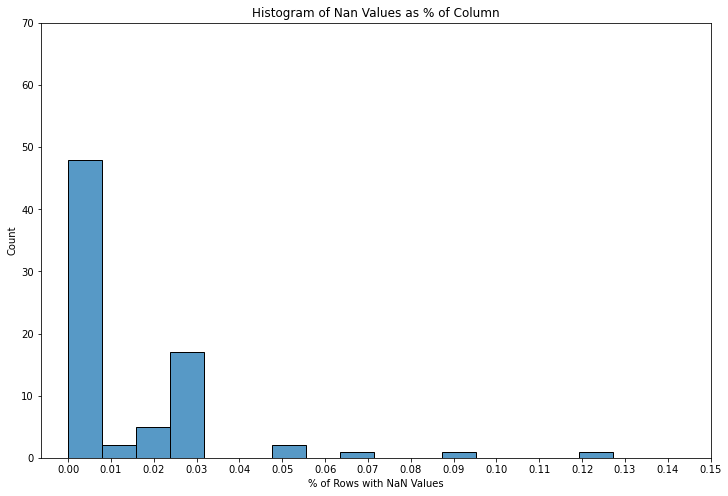

In [35]:
fig,ax = plt.subplots(figsize=(12,8))
sns.histplot(data=df.isna().mean(),bins=16)
plt.xticks(np.linspace(0,.15,16))
plt.title("Histogram of Nan Values as % of Column")
plt.xlabel('% of Rows with NaN Values')
plt.yticks(np.linspace(0,70,8))

In [36]:
def na_check(data):
    check = np.round(data.isna().mean().sort_values(ascending=False),2)
    return check

1860331 of loans fully paid or charged off i.e. target variable

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2925493 entries, 0 to 2925492
Data columns (total 77 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   id                          object 
 1   loan_amnt                   float16
 2   term                        object 
 3   int_rate                    object 
 4   installment                 float16
 5   grade                       object 
 6   sub_grade                   object 
 7   emp_title                   object 
 8   emp_length                  object 
 9   home_ownership              object 
 10  annual_inc                  float32
 11  verification_status         object 
 12  issue_d                     object 
 13  loan_status                 object 
 14  pymnt_plan                  object 
 15  url                         object 
 16  purpose                     object 
 17  title                       object 
 18  zip_code                    object 
 19  addr_state           

In [41]:
len(df)

2925493

In [40]:
len(df.loc[df['loan_status'].isin(['Fully Paid','Charged Off'])])

1860331

In [42]:
#our target variable is loan status and whether or not a client who received a loan fully paid or charged off their loan
#will make a df with only these values so we can model 
clean = df.loc[df['loan_status'].isin(['Fully Paid','Charged Off'])]

In [43]:
na_check(clean).head(20)

mths_since_recent_inq         0.12
num_tl_120dpd_2m              0.07
emp_title                     0.07
mo_sin_old_il_acct            0.07
emp_length                    0.06
bc_util                       0.04
pct_tl_nvr_dlq                0.04
avg_cur_bal                   0.04
mo_sin_rcnt_rev_tl_op         0.04
mo_sin_old_rev_tl_op          0.04
num_tl_30dpd                  0.04
num_accts_ever_120_pd         0.04
tot_cur_bal                   0.04
num_tl_90g_dpd_24m            0.04
total_il_high_credit_limit    0.04
num_tl_op_past_12m            0.04
mo_sin_rcnt_tl                0.04
num_bc_tl                     0.04
num_il_tl                     0.04
num_op_rev_tl                 0.04
dtype: float64

In [44]:
rem_nans = np.round(clean.isna().mean().sort_values(ascending=False),2)
five_pc_nan = list(rem_nans[(rem_nans>0) & (rem_nans <.05)].index)

In [47]:
len(clean)

1860331

In [48]:
clean.dropna(subset=five_pc_nan,inplace=True)

<ipython-input-48-a53ae10695cc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean.dropna(subset=five_pc_nan,inplace=True)


0.07% of rows dropped for nan values or 119,268 rows

In [50]:
1860331 - len(clean)

119268

In [20]:
(na_check(clean)).head(10)

mths_since_recent_inq    0.10
emp_title                0.07
emp_length               0.06
num_tl_120dpd_2m         0.04
mo_sin_old_il_acct       0.03
last_pymnt_d             0.00
dti                      0.00
last_credit_pull_d       0.00
zip_code                 0.00
inq_last_6mths           0.00
dtype: float64

In [51]:
#exporting as csv and finishing in another notebook as the sheer size of the file causes latency issues
clean.to_csv('data\cleaned_data')